In [1]:
include("../encoding.jl")
include("../plotting.jl")

legend_py (generic function with 1 method)

# One dimension: function

In [2]:
D = 20_000
f(x) = x*sin(10x)
x = range(0,1, length=200)
xs = rand(100);

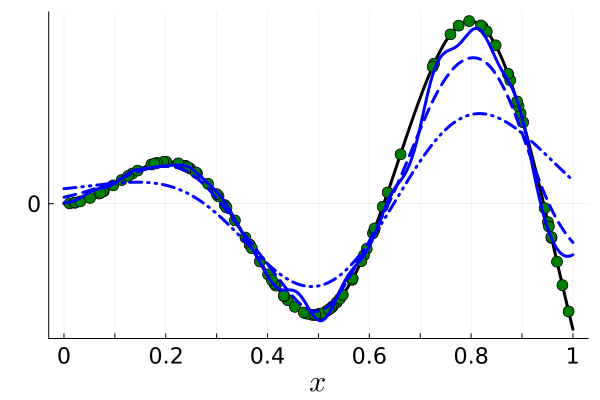

In [3]:
bipolar=false


xvalues = range(0,1,length=11);
xmarks = [0, "", 0.2, "", 0.4, "", 0.6, "", 0.8, "", 1]
yvalues = [0];

lengthscales = [0.4, 0.2, 0.1]
linestyles = [:dashdotdot, :dash, :solid]


pl = plot(x, f.(x), c=:black, legend=false, linewidth=3, xticks=(xvalues, xmarks), yticks=yvalues, xlabel=L"x")
scatter!(xs, f.(xs), c=:green, legend=false, markersize=6)
for i in 1:3
    encoder = realvalue_encoder(lengthscales[i],D, bipolar=bipolar);
    Δx = encode(encoder, x);
    Δxs = encode(encoder, xs);
    
    P = sum(Δxs',dims=2) / length(xs);
    phat = Δxs * P / D
    F = Δxs' * (f.(xs) ./ phat) /length(xs); #density correction
    
    plot!(x, Δx * F / D, linewidth=3, c=:blue, linestyle=linestyles[i])
end
plot!(guidefontsize=20, tickfontsize=15,left_margin = 5Plots.mm)
save(pl, "1D_bipolar"*string(bipolar))
pl

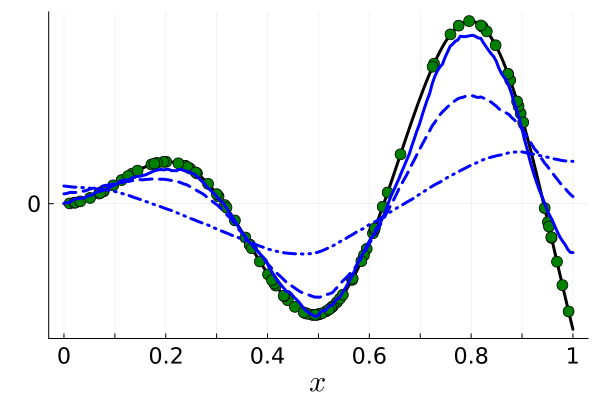

In [4]:
bipolar=true


xvalues = range(0,1,length=11);
xmarks = [0, "", 0.2, "", 0.4, "", 0.6, "", 0.8, "", 1]
yvalues = [0];

lengthscales = [0.4, 0.2, 0.1]
linestyles = [:dashdotdot, :dash, :solid]


pl = plot(x, f.(x), c=:black, legend=false, linewidth=3, xticks=(xvalues, xmarks), yticks=yvalues, xlabel=L"x")
scatter!(xs, f.(xs), c=:green, legend=false, markersize=6)
for i in 1:3
    encoder = realvalue_encoder(lengthscales[i],D, bipolar=bipolar);
    Δx = encode(encoder, x);
    Δxs = encode(encoder, xs);
    
    P = sum(Δxs',dims=2) / length(xs);
    phat = Δxs * P / D
    F = Δxs' * (f.(xs) ./ phat) /length(xs); #density correction
    
    plot!(x, Δx * F / D, linewidth=3, c=:blue, linestyle=linestyles[i])
end
plot!(guidefontsize=20, tickfontsize=15,left_margin = 5Plots.mm)
save(pl, "1D_bipolar"*string(bipolar))
pl

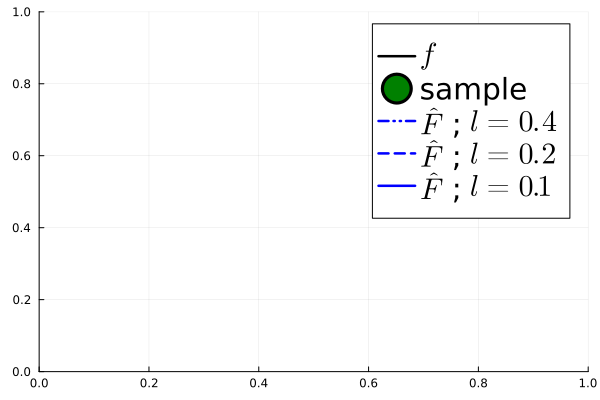

In [5]:
# generate the guide for previous figures
guide = plot([2],[2],xlim=(0,1), ylim=(0,1), legendfontsize=20, c=:black, label=L"f")
scatter!([2],[2],xlim=(0,1), ylim=(0,1), legendfontsize=20, c=:green, label="sample")
for i in 1:3
    plot!([2,2], [2,2],linewidth=3, c=:blue, linestyle=linestyles[i], label=L"$\hat{F}$ ; $l="*string(lengthscales[i]))
end 
save(guide, "1D_guide")
guide

# One dimension: spectrum

In [6]:
xs = [0.1, 0.14, 0.5, 0.6, 0.7, 0.75, 0.9]
fxs = rand(7);

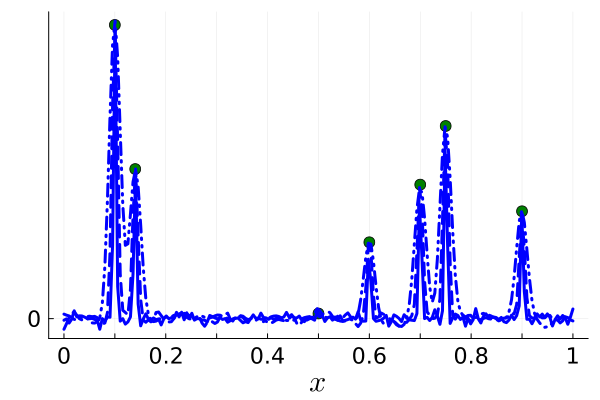

In [7]:
bipolar=false


xvalues = range(0,1,length=11);
xmarks = [0, "", 0.2, "", 0.4, "", 0.6, "", 0.8, "", 1]
yvalues = [0];

lengthscales = [0.04, 0.02, 0.01]
linestyles = [:dashdotdot, :dash, :solid]

pl = plot(c=:black, legend=false, linewidth=3, xticks=(xvalues, xmarks), yticks=yvalues, xlabel=L"x")
scatter!(xs, fxs, c=:green, legend=false, markersize=6)
for i in 1:3
    encoder = realvalue_encoder(lengthscales[i],D, bipolar=bipolar);
    Δx = encode(encoder, x);
    Δxs = encode(encoder, xs);
    
    P = sum(Δxs',dims=2) / length(xs);
    phat = Δxs * P / D
    F = Δxs' * (fxs ./ phat) /length(xs); #density correction
    
    plot!(x, Δx * F / D, linewidth=3, c=:blue, linestyle=linestyles[i])
end
plot!(guidefontsize=20, tickfontsize=15,left_margin = 5Plots.mm)
save(pl, "1Dspectrum_bipolar"*string(bipolar))
pl

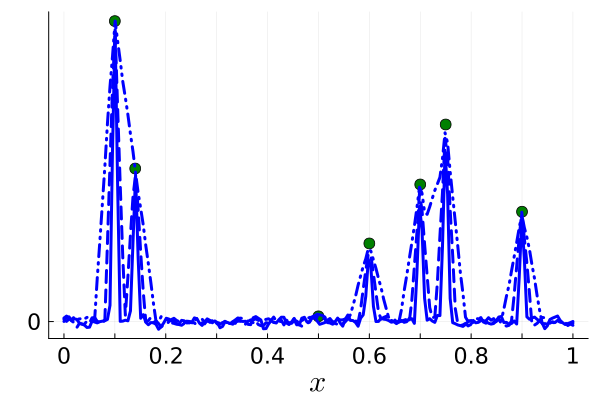

In [8]:
bipolar=true


xvalues = range(0,1,length=11);
xmarks = [0, "", 0.2, "", 0.4, "", 0.6, "", 0.8, "", 1]
yvalues = [0];

lengthscales = [0.04, 0.02, 0.01]
linestyles = [:dashdotdot, :dash, :solid]

pl = plot(c=:black, legend=false, linewidth=3, xticks=(xvalues, xmarks), yticks=yvalues, xlabel=L"x")
scatter!(xs, fxs, c=:green, legend=false, markersize=6)
for i in 1:3
    encoder = realvalue_encoder(lengthscales[i],D, bipolar=bipolar);
    Δx = encode(encoder, x);
    Δxs = encode(encoder, xs);
    
    P = sum(Δxs',dims=2) / length(xs);
    phat = Δxs * P / D
    F = Δxs' * (fxs ./ phat) /length(xs); #density correction
    
    plot!(x, Δx * F / D, linewidth=3, c=:blue, linestyle=linestyles[i])
end
plot!(guidefontsize=20, tickfontsize=15,left_margin = 5Plots.mm)
save(pl, "1Dspectrum_bipolar"*string(bipolar))
pl

# Two Dimensions

In [2]:
using Base.Iterators
using LinearAlgebra

In [3]:
D, l = 20_000, 0.1
x = range(0,1, length=100)
xy_grid = collect(product(x,x));
xy = collect(reduce(hcat, collect.(vec(xy_grid)))');

In [4]:
bipolar = true

encoder = realvalue_encoder(l,D, bipolar=bipolar);
Δxy = encode(encoder, xy[:,1]) .* circshift(encode(encoder, xy[:,2]), (0,1));

In [5]:
function f(args::Vector)
    m1 = [0.35,0.35]
    m2 = [0.65,0.65]
    s = 0.15
    return exp(-LinearAlgebra.norm(((args .-m1) /s))^2) + exp(-LinearAlgebra.norm(((args .-m2) /s))^2)
end
fxy = reshape(f.(xy[i,:] for i in 1:size(xy, 1)), size(xy_grid));

In [6]:
xmarks = [0, "", 0.2, "", 0.4, "", 0.6, "", 0.8, "", 1]
xvalues=range(1,size(fxy,1), length=length(xmarks))

1.0:9.9:100.0

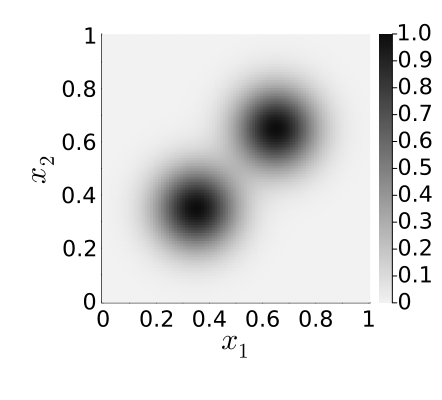

In [7]:
pl = heatmapplot(fxy, cgrad(:grays, rev=true))
save(pl, "2D_function")
pl

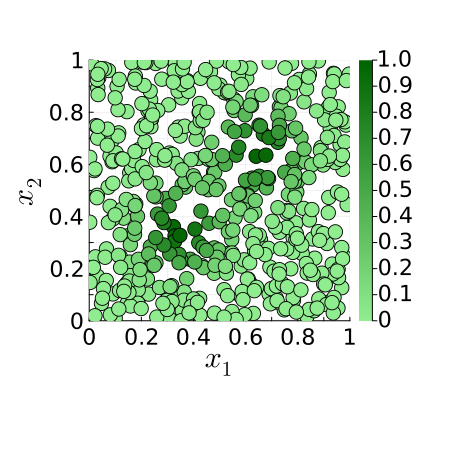

In [8]:
xys = rand(500,2)
fxys = [f(xys[i,:]) for i in 1:size(xys,1)];
pl = scatterplot(xys[:,1], xys[:,2],fxys,cgrad(:greens, rev=false),1,colorbar=true,xlabel=L"x_1", ylabel=L"x_2", clim=(0,1))
save(pl, "2Dsample")
pl

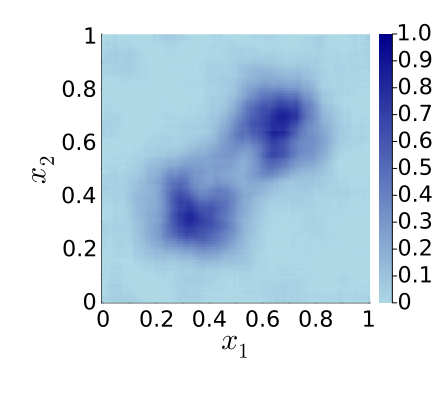

In [10]:
Δxys = encode(encoder, xys[:,1]) .* circshift(encode(encoder, xys[:,2]), (0,1));
P = sum(Δxys',dims=2) / size(xys,1);
phat = Δxys * P / D
F = Δxys' * (fxys ./ phat) / size(xys,1); #density correction
pl = heatmapplot(reshape(Δxy * F / D, size(fxy))', cgrad(:blues, rev=false))
save(pl, "2D_bipolar"*string(bipolar))
pl

# Proteins

In [11]:
using DelimitedFiles

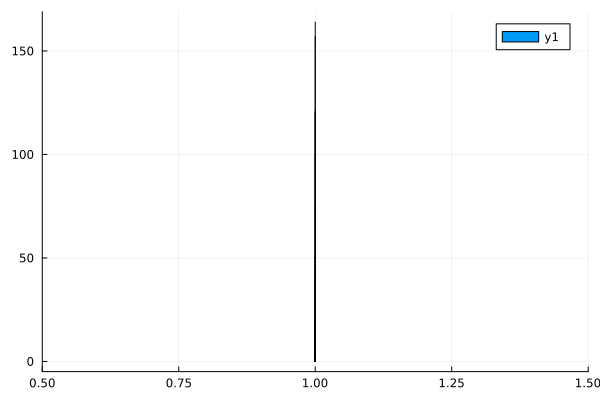

In [12]:
ϕx = readdlm("../proteins_X") .+ 0.04  #a small value is added to account for negative values when computing normalizatin function
y = readdlm("../proteins_y")[:]
umapx = readdlm("../proteins_UMAP");
bounds = 0.1
umapx = (1-2*bounds)*umapx .+bounds # some space at the boundaries for a nicer plot

D = size(ϕx,2)
K = ϕx*ϕx' / D
n = find_normalization(K, n_iter=10)
Δx = ϕx ./ n;

histogram(mean(Δx*Δx'/D, dims=2),xlim=(0.5,1.5))

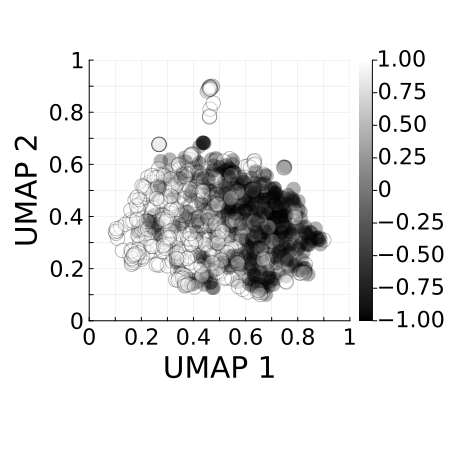

In [15]:
pl = scatterplot(umapx[:,1], umapx[:,2], y, cgrad(:greys, rev=false), 0.3)
save(pl, "protein_function")
    
pl

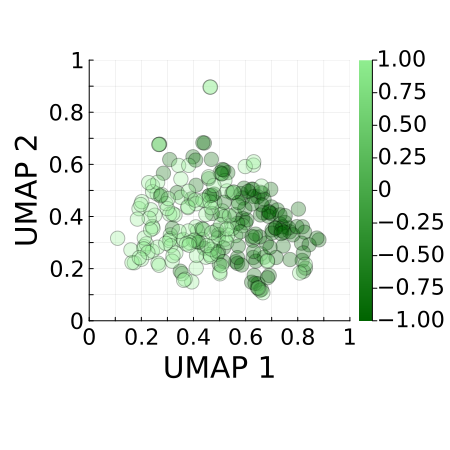

In [16]:
sample = 1:250
pl = scatterplot(umapx[sample,1], umapx[sample,2], y[sample], cgrad(:greens, rev=true), 0.3)
save(pl, "protein_sample")
pl

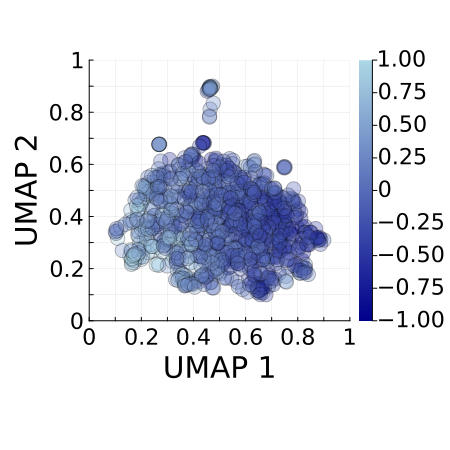

In [17]:
P = sum(Δx[sample,:]',dims=2) / length(sample);
phat = Δx[sample,:] * P / D
F = Δx[sample,:]' * (y[sample] ./ phat) /length(sample); #density correction
pl = scatterplot(umapx[:,1], umapx[:,2], (Δx*F /D)[:], cgrad(:blues, rev=true), 0.3)
save(pl, "protein_estimation")
pl